In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
sns.set('paper', 'ticks', font_scale=0.9)

col_w = (7. - .25) / 2.
full_w = 7.

def savefig(fig, name):
    fig.savefig('../doc/paper/figures/{}.pdf'.format(name), bbox_inches='tight', pad_inches=0.)

# Load data and do some preprocessing

In [4]:
df = pd.DataFrame({k: np.squeeze(v) for k, v in np.load('../data/170119.npz').iteritems()})

In [5]:
abbrev = {'UsherMcClelland': 'UMcC', 'DriftDiffusion': 'DD'}
df['condition'] = df.apply(lambda x: '{}, {}, {}'.format(
    abbrev[x['network']], x['scale'], x['share_thresholding_intercepts']), axis=1)
cond_order = ['UMcC, 1.0, False', 'DD, 1.0, False', 'DD, 0.2, False', 'DD, 1.0, True', 'DD, 0.2, True']

In [6]:
dfd = df.query('decided == True')

# Number clear decisions

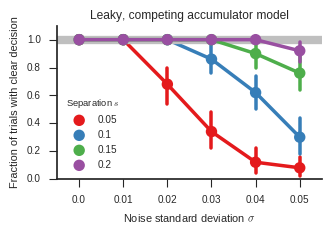

In [7]:
fig = plt.figure(figsize=(col_w, col_w / 1.4))
sns.pointplot('noise', 'decided', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=1., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Fraction of trials with clear decision")
plt.title("Leaky, competing accumulator model")
plt.gca().get_legend().set_title("Separation $s$")
sns.despine()
plt.tight_layout()

In [8]:
savefig(fig, 'decisions')

# Correct trials

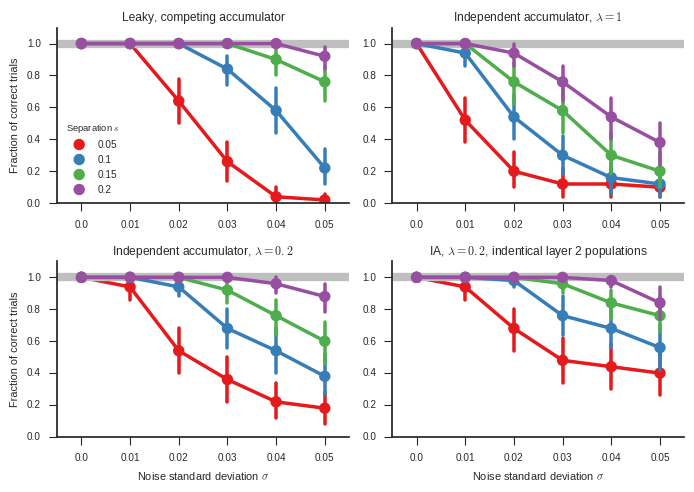

In [9]:
fig = plt.figure(figsize=(full_w, full_w / 1.4))
datasets = [
    df.query('network == "UsherMcClelland" and baseline == 1.'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == 1. and not share_thresholding_intercepts'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == .2 and not share_thresholding_intercepts'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == .2 and share_thresholding_intercepts'),
]
titles = [
    "Leaky, competing accumulator",
    r"Independent accumulator, $\lambda = 1$",
    r"Independent accumulator, $\lambda = 0.2$",
    r"IA, $\lambda = 0.2$, indentical layer 2 populations",
]

ax=None
for i, (title, data) in enumerate(zip(titles, datasets)):
    ax = plt.subplot(2, 2, i + 1, sharey=ax)
    ax.axhline(y=1., lw=6, c=(0.75, 0.75, 0.75))
    sns.pointplot('noise', 'correct', 'target_sep', data=data, palette='Set1')
    if i > 0:
        ax.legend().remove()
    else:
        ax.get_legend().set_title("Separation $s$")
    plt.ylim(0, 1.1)
    plt.title(title)
    if i > 1:
        plt.xlabel(r"Noise standard deviation $\sigma$")
    else:
        plt.xlabel("")
    if i % 2 == 0:
        plt.ylabel("Fraction of correct trials")
    else:
        plt.ylabel("")

sns.despine()
plt.tight_layout()

In [10]:
savefig(fig, 'correct')

# Decision times

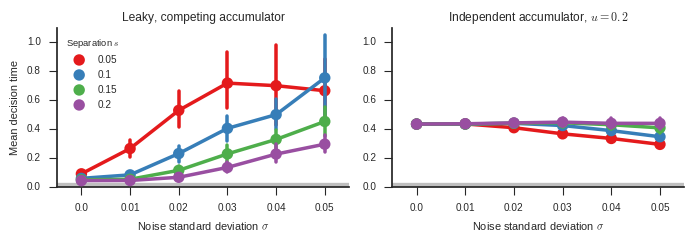

In [11]:
fig = plt.figure(figsize=(full_w, full_w / 2. / 1.4))

plt.subplot(1, 2, 1)
sns.pointplot('noise', 't', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("Leaky, competing accumulator")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Mean decision time")
plt.gca().get_legend().set_title("Separation $s$")
sns.despine()

plt.subplot(1, 2, 2)
sns.pointplot('noise', 't', 'target_sep', data=df.query('network == "DriftDiffusion" and baseline == .2 and scale == 1. and not share_thresholding_intercepts'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("Independent accumulator, $u = 0.2$")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("")
plt.gca().legend().remove()
sns.despine()

plt.tight_layout()

In [12]:
savefig(fig, 'time')

# Error plots

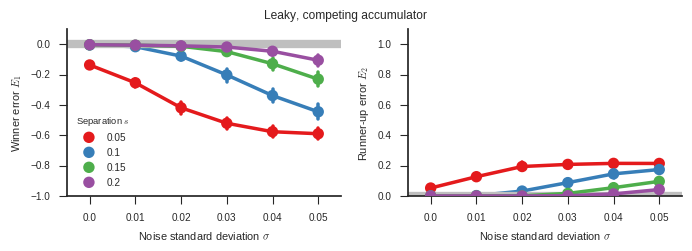

In [13]:
fig = plt.figure(figsize=(full_w, full_w / 2. / 1.4))

plt.subplot(1, 2, 1)
sns.pointplot('noise', 'winner_err', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(-1., 0.1)
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Winner error $E_1$")
plt.gca().get_legend().set_title("Separation $s$")
sns.despine()

plt.subplot(1, 2, 2)
sns.pointplot('noise', 'runnerup_err', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Runner-up error $E_2$")
plt.gca().legend().remove()
sns.despine()

plt.suptitle("Leaky, competing accumulator")
plt.tight_layout()
plt.subplots_adjust(top=0.9)

In [14]:
savefig(fig, 'error')

# Transient response

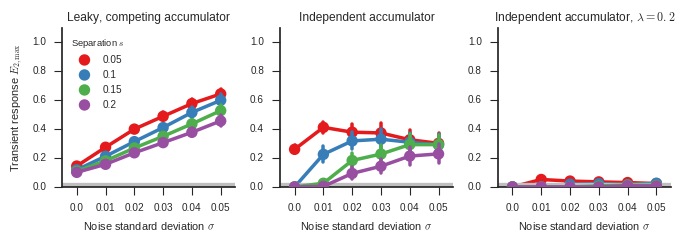

In [15]:
fig = plt.figure(figsize=(full_w, full_w / 2. / 1.4))

plt.subplot(1, 3, 1)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("Leaky, competing accumulator")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Transient response $E_{2,\mathrm{max}}$")
plt.gca().get_legend().set_title("Separation $s$")
sns.despine()

plt.subplot(1, 3, 2)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "DriftDiffusion" and scale == 1. and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("Independent accumulator")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("")
plt.gca().legend().remove()
sns.despine()

plt.subplot(1, 3, 3)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "DriftDiffusion" and scale == .2 and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title(r"Independent accumulator, $\lambda = 0.2$")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("")
plt.gca().legend().remove()
sns.despine()

plt.tight_layout()

In [16]:
savefig(fig, 'transient')